In [1]:
# 1、数据集探索
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#显示黑体
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv(r'D:\data\python\data\abnormal\abnormal_orders.txt')

In [3]:
data.head()

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [4]:
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'abnormal_label'],
      dtype='object')

In [5]:
data.shape

(134190, 14)

In [6]:
# 列表替换为中文
data.columns = ['订单ID','下单日期','下单时间','商品一级类别','商品所属渠道'
                ,'商品ID','品牌','订单金额','商品销售数量','订单渠道','支付方式','下单用户ID','城市','异常']

In [7]:
data.columns.tolist()

['订单ID',
 '下单日期',
 '下单时间',
 '商品一级类别',
 '商品所属渠道',
 '商品ID',
 '品牌',
 '订单金额',
 '商品销售数量',
 '订单渠道',
 '支付方式',
 '下单用户ID',
 '城市',
 '异常']

In [8]:
data.head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [9]:
# 标签探索
data['异常'].value_counts()

0    105733
1     28457
Name: 异常, dtype: int64

In [10]:
#占比
(data['异常']==1).sum()/data.shape[0]

0.2120649824875177

In [11]:
# 实际业务中先询问异常的定义

In [12]:
# 特征探索
data['下单日期'].value_counts()

2013-10-31    690
2013-03-21    429
2013-11-01    426
2013-01-24    422
2013-03-23    416
             ... 
2013-07-31     17
2013-08-31     14
2013-03-31      2
2013-01-31      2
2013-05-31      2
Name: 下单日期, Length: 364, dtype: int64

In [13]:
# 判断为全年交易数据的抽样数据

In [14]:
#检查订单ID是否为唯一值
data['订单ID'].duplicated().sum()

19212

In [15]:
# （1）数据中存在大量重复值
# （2）每个样本并不是订单，可能是订单中的一个商品/一笔交易，因此标签中的异常可能是‘该笔交易的异常’

In [16]:
data['商品一级类别'].value_counts()

手机摄影数码       20612
生活电器厨卫电器     19281
家纺寝居         18679
电脑办公打印文仪     11405
家居日用         10642
电视冰箱洗衣机空调     9067
美妆个护          9043
汽车用品          6490
家具建材          4941
食品酒水          4669
健康医疗          4252
服饰鞋帽          4067
运动户外          3934
母婴用品玩具        2664
箱包奢品          1962
钟表首饰           860
图书音像           232
Name: 商品一级类别, dtype: int64

In [17]:
# 高位为电子产品、小型家电以及家纺，整个类别明显是带有部分家具/家电性质的商场的类别

In [18]:
data['商品所属渠道'].value_counts()

GO     91170
POP    43020
Name: 商品所属渠道, dtype: int64

In [19]:
# POP-platform open plan 平台开放计划-价值链整合模式中入驻的第三方/个人商家，货物来自第三方商家自己的供应商
# GO-无法判断含义，从商品的订单占比来看，判断可能是价值链整合模式中的自营商家的品牌。货物来自自营商家自己的供应商/厂房/工厂

In [20]:
data['订单渠道'].value_counts()

主站            96894
抢购            16256
手机站点           7098
团购             6294
手机抢购           3095
do.site_id     2394
手机团购           1074
充值              703
当当              377
游戏站点              5
Name: 订单渠道, dtype: int64

In [21]:
data['支付方式'].value_counts()

合并支付    104274
货到付款     26785
当当支付      2511
在线支付       421
账户余额       199
Name: 支付方式, dtype: int64

In [22]:
data['城市'].value_counts()

北京市        14554
上海市         6637
广州市         6033
深圳市         5468
天津市         3393
           ...  
四川省其他城市        1
神农架林区          1
山西省其他城市        1
云南省其他城市        1
果洛州            1
Name: 城市, Length: 365, dtype: int64

In [23]:
# 查看数据其他信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134190 entries, 0 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    134190 non-null  int64  
 1   下单日期    134190 non-null  object 
 2   下单时间    134190 non-null  object 
 3   商品一级类别  132800 non-null  object 
 4   商品所属渠道  134190 non-null  object 
 5   商品ID    134190 non-null  int64  
 6   品牌      133418 non-null  object 
 7   订单金额    134189 non-null  float64
 8   商品销售数量  134190 non-null  int64  
 9   订单渠道    134190 non-null  object 
 10  支付方式    134190 non-null  object 
 11  下单用户ID  134190 non-null  object 
 12  城市      134188 non-null  object 
 13  异常      134190 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.3+ MB


In [24]:
data.select_dtypes(include='int64').head()

,订单ID,商品ID,商品销售数量,异常
0,4277880103,8000001215,1000,0
1,4283851335,8002042497,200,1
2,4277700101,7000000960,160,1
3,4276537082,8001992420,100,1
4,4281111595,8002199518,100,1


2、缺失值处理
缺失与异常的关系

In [25]:
data.isnull().sum()

订单ID         0
下单日期         0
下单时间         0
商品一级类别    1390
商品所属渠道       0
商品ID         0
品牌         772
订单金额         1
商品销售数量       0
订单渠道         0
支付方式         0
下单用户ID       0
城市           2
异常           0
dtype: int64

订单金额与城市分别有1、2个缺失。完全可以忽略不计<br>
在商品质量参差不齐的电商领域，品牌信息缺失并不值得注意，稍微调查一下‘商品一级类别’中缺失的情况即可<br>

In [26]:
data.isnull().sum()/data.shape[0]

订单ID      0.000000
下单日期      0.000000
下单时间      0.000000
商品一级类别    0.010358
商品所属渠道    0.000000
商品ID      0.000000
品牌        0.005753
订单金额      0.000007
商品销售数量    0.000000
订单渠道      0.000000
支付方式      0.000000
下单用户ID    0.000000
城市        0.000015
异常        0.000000
dtype: float64

In [27]:
for i in ['商品一级类别','品牌']:
    ratio1 = 100*data.loc[data[i].isnull(),'异常'].sum()/data[i].isnull().sum()
    print('缺少({})的样本中异常样本占比为{:.3f}%'.format(i,ratio1))

缺少(商品一级类别)的样本中异常样本占比为11.727%
缺少(品牌)的样本中异常样本占比为20.984%


In [28]:
for i in ['商品一级类别','品牌']:
    ratio1 = 100*data.loc[data[i].isnull(),'异常'].sum()/(data['异常']==1).sum()
    print('全部交易异常样本中，缺少({})的异常样本占比为{:.3f}%'.format(i,ratio1))

全部交易异常样本中，缺少(商品一级类别)的异常样本占比为0.573%
全部交易异常样本中，缺少(品牌)的异常样本占比为0.569%


In [29]:
# 全部交易样本中，缺失样本的占比非常小，可以直接删除

In [30]:
data.dropna(how='any',inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132761 entries, 1 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    132761 non-null  int64  
 1   下单日期    132761 non-null  object 
 2   下单时间    132761 non-null  object 
 3   商品一级类别  132761 non-null  object 
 4   商品所属渠道  132761 non-null  object 
 5   商品ID    132761 non-null  int64  
 6   品牌      132761 non-null  object 
 7   订单金额    132761 non-null  float64
 8   商品销售数量  132761 non-null  int64  
 9   订单渠道    132761 non-null  object 
 10  支付方式    132761 non-null  object 
 11  下单用户ID  132761 non-null  object 
 12  城市      132761 non-null  object 
 13  异常      132761 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 15.2+ MB


In [32]:
# 整理索引
data.index = range(data.shape[0])

In [33]:
data.shape[0]

132761

In [34]:
(data['异常']==1).sum()

28284

In [35]:
(data['异常']==1).sum()/data.shape[0]

0.21304449348829851

In [36]:
# 重复值处理

In [37]:
data['订单ID'].duplicated().sum()

18554

In [38]:
# 整个数据集的重复
data.duplicated().sum()

8

In [39]:
data.drop_duplicates(inplace=True)

In [40]:
data.shape

(132753, 14)

In [41]:
# 因此订单ID重复值大概率是订单中的不同商品

In [42]:
data['订单ID'].value_counts()

4279118253    32
4269390206    23
4271884108    20
4275856215    20
4265415474    19
              ..
4279111697     1
4280944658     1
4284934145     1
4283578388     1
4285530112     1
Name: 订单ID, Length: 114207, dtype: int64

In [43]:
data[data['订单ID']==4279118253].head(10)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
95213,4279118253,2013-07-23,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95214,4279118253,2013-11-08,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95215,4279118253,2013-01-26,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95216,4279118253,2013-02-03,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95217,4279118253,2013-07-06,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95218,4279118253,2013-04-28,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95219,4279118253,2013-10-04,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95220,4279118253,2013-02-21,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95221,4279118253,2013-06-18,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95222,4279118253,2013-09-25,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0


In [44]:
data[data['订单ID']==4269390206].head(10)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
76916,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0
76921,4269390206,2013-05-03,02:11:10,生活电器厨卫电器,GO,1000320932,凯伍德,1690.0,1,主站,合并支付,1390109546,西安市,0
76922,4269390206,2013-05-02,02:11:10,家居日用,GO,1000336076,康宁,439.0,1,主站,合并支付,1390109546,西安市,0
76923,4269390206,2013-12-19,02:11:10,家居日用,GO,1000192284,国研联合,158.0,1,主站,合并支付,1390109546,西安市,0
76924,4269390206,2013-10-28,02:11:10,家居日用,GO,1000104751,苏泊尔,459.0,1,主站,合并支付,1390109546,西安市,0
76925,4269390206,2013-12-05,02:11:10,家居日用,GO,1000104746,苏泊尔,229.0,1,主站,合并支付,1390109546,西安市,0


In [45]:
# 找出重复订单的索引
DupOrder = data['订单ID'].value_counts().index

In [46]:
#查看重复订单ID下，异常订单的情况
for i in DupOrder[:30]:
    AbOrder = (data.loc[data['订单ID']==i,'异常']==1).sum()
    print(i,":",AbOrder)

4279118253 : 0
4269390206 : 0
4271884108 : 20
4275856215 : 20
4265415474 : 0
4279551124 : 0
4283339603 : 0
4283339890 : 0
4283336310 : 0
4283873538 : 0
4283339774 : 0
4283874524 : 0
4283874688 : 0
4283874398 : 0
4283874209 : 0
4283873946 : 0
4276167340 : 0
4282513806 : 0
4282561933 : 0
4282842151 : 0
4193043860 : 16
4282512627 : 0
4282513764 : 0
4272509367 : 0
4282842230 : 0
4282842130 : 0
4282842193 : 0
4282842612 : 0
3826438122 : 0
4285070202 : 0


In [47]:
# 同一个订单ID下的产品ID有重复吗
data.loc[data['订单ID']==4271884108,'商品ID'].duplicated().sum()

0

In [48]:
# 同一个订单ID下的产品ID有重复吗
data.loc[data['订单ID']==4275856215,'商品ID'].duplicated().sum()

0

In [49]:
# 同一个订单ID下的产品ID有重复吗
data.loc[data['订单ID']==4193043860,'商品ID'].duplicated().sum()

0

In [50]:
# 去重之前的异常订单数量：
(data['异常']==1).sum()

28284

In [51]:
data2 = data.drop(columns='下单日期')

In [52]:
# 数据占比很小
data2.duplicated().sum()

1471

In [53]:
# 取出重复值的索引，按索引删除重复值
data.drop(index=data[data2.duplicated()].index,inplace=True)

In [54]:
data['订单ID'].value_counts()

4269390206    23
4275856215    20
4271884108    20
4265415474    19
4283336310    18
              ..
4284571775     1
4284913792     1
4242454660     1
4178489477     1
4285530112     1
Name: 订单ID, Length: 114207, dtype: int64

In [55]:
# 整理索引
data.index = range(data.shape[0])

In [56]:
# 确认剩余异常订单的数量
(data['异常']==1).sum()

28284

In [57]:
# 异常订单并没有人造的部分，其他的‘人造订单’可能是人为增加的

In [58]:
# 任意订单ID下，所有样本的标签是一致的

In [59]:
#有异常的订单
data.loc[data['异常']==1,'订单ID'].value_counts()

4275856215    20
4271884108    20
4193043860    16
4272902282    15
4263198458    14
              ..
4282488931     1
4261577594     1
3982046076     1
4276053188     1
4196075521     1
Name: 订单ID, Length: 25107, dtype: int64

In [60]:
data.loc[data['订单ID'] == 4263198458,'异常']

1560     1
3931     1
3932     1
14800    1
14801    1
14802    1
14803    1
14804    1
14805    1
14806    1
14807    1
14808    1
14809    1
14810    1
Name: 异常, dtype: int64

In [61]:
# 验证：一个订单下的所有标签都是一致的
label_1 = data.loc[data['异常']==1,'订单ID'].value_counts()

In [62]:
df = pd.DataFrame()
for idx,i in enumerate(label_1.index):
    ratio = label_1[i]/data[data['订单ID']==i].shape[0]
    df.loc[idx,'订单ID'] = i
    df.loc[idx,'该ID下交易异常样本占所有样本的比例'] = ratio

In [63]:
df['该ID下交易异常样本占所有样本的比例'].value_counts()

1.0    25102
0.5        5
Name: 该ID下交易异常样本占所有样本的比例, dtype: int64

In [64]:
OrderMonth = data['下单日期'].apply(lambda x:x[5:7])
OrderMonth.value_counts()

10    11651
06    11201
09    11124
03    11113
07    11011
01    10959
04    10912
05    10888
12    10842
08    10837
11    10723
02    10021
Name: 下单日期, dtype: int64

In [65]:
data.drop(columns='下单日期',inplace=True)

In [66]:
data.columns

Index(['订单ID', '下单时间', '商品一级类别', '商品所属渠道', '商品ID', '品牌', '订单金额', '商品销售数量',
       '订单渠道', '支付方式', '下单用户ID', '城市', '异常'],
      dtype='object')

In [67]:
data.loc[:,['订单金额','商品销售数量']].describe()

,订单金额,商品销售数量
count,131282.000000,131282.000000
mean,667.187834,1.188975
std,2930.730828,1.684653
min,0.500000,1.000000
25%,29.000000,1.000000
50%,98.000000,1.000000
75%,379.000000,1.000000
max,766000.000000,200.000000


异常值处理
箱线图

In [68]:
# 进行异常检测，并保存特征异常的样本索引
NumOfSamples = data.shape[0]
DataNoAbnormal = data.copy()
BoxAbnormalIdx = []#保存特征异常的样本的索引
for idx,column in enumerate(['订单金额','商品销售数量']):
    #提取当前要检测的列
    feature = data.loc[:,column]
    #从训练集中计算QL、QU、IQR、中位数
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL

    error = feature[((feature < (QL-1.5*IQR)).astype(int) + (feature > (QU+1.5*IQR)).astype(int)) != 0]
    BoxAbnormalIdx.extend(error.index)

In [69]:
len(BoxAbnormalIdx)

31266

In [70]:
# 去重
BoxAbnormalIdx = set(BoxAbnormalIdx)

In [71]:
len(BoxAbnormalIdx)

29949

In [72]:
len(BoxAbnormalIdx)/data.shape[0]
#占总体样本比例太高，无法直接删除

0.22812723754970216

In [73]:
# 特征异常的样本中，有多少被标记为交易异常
(data.loc[BoxAbnormalIdx,'异常']==1).sum()

7368

In [74]:
df = pd.DataFrame(index = data.index)

In [75]:
df['特征异常'] = 0

In [76]:
df.loc[BoxAbnormalIdx,'特征异常'] = 1

In [77]:
pd.concat([df['特征异常'],data['异常']],axis=1).corr()

,特征异常,异常
特征异常,1.000000,0.040428
异常,0.040428,1.000000


In [78]:
data.head()

,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0


In [79]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold#确定交叉验证的具体方式
from sklearn.ensemble import RandomForestClassifier as RFC#能调的参数较少，效果好

In [80]:
oe = OrdinalEncoder()

In [81]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [82]:
X['下单时间'] = X['下单时间'].apply(lambda x:x[:2])#转化为小时数

In [83]:
X = pd.DataFrame(oe.fit_transform(X))

In [84]:
X.columns = data.iloc[:,:-1].columns

In [85]:
X.head()

,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市
0,99753.0,14.0,5.0,1.0,15907.0,227.0,3009.0,41.0,1.0,0.0,24870.0,5.0
1,56307.0,14.0,11.0,1.0,15431.0,1551.0,2970.0,40.0,1.0,0.0,50713.0,207.0
2,81338.0,10.0,2.0,1.0,18402.0,2049.0,621.0,40.0,1.0,0.0,46259.0,133.0
3,7028.0,23.0,5.0,1.0,19080.0,377.0,1499.0,40.0,1.0,0.0,62154.0,101.0
4,11982.0,16.0,3.0,1.0,18580.0,748.0,2799.0,40.0,1.0,0.0,56469.0,223.0


In [86]:
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [87]:
# 准确率
clf = RFC(n_estimators=200,random_state=1412)

In [88]:
acc = cross_val_score(clf,X,y,cv=cv)

In [89]:
acc

array([0.83135926, 0.82903607, 0.83379037, 0.83062919, 0.83040067])

In [90]:
acc.mean()

0.8310431109436079

In [91]:
acc.var()

2.4519355730563564e-06

In [92]:
auc = cross_val_score(clf,X,y,cv=cv,scoring='roc_auc')

In [93]:
auc

array([0.8595687 , 0.85973819, 0.85958133, 0.85944336, 0.85626684])

In [94]:
auc.mean()

0.8589196852471133

In [95]:
auc.var()

1.7681487240840121e-06

In [96]:
data.groupby('订单ID').count().mean()[0]

1.1495092244783596

In [97]:
orderid = data['订单ID'].unique()

In [98]:
orderid

array([4283851335, 4276537082, 4281111595, ..., 4285765029, 4285770012,
       4285770056], dtype=int64)

In [99]:
len(orderid)

114207

In [100]:
# 从全ID中，按照30%的比例，抽样出测试用的ID
# random.sample(需要抽样的总列表，需要抽样的比例)
import random
random.seed(1412)
test_id = random.sample(orderid.tolist(),int(len(orderid)*0.3))

In [101]:
train_id = orderid.copy().tolist()
for i in test_id:
    train_id.remove(i)

In [102]:
len(train_id)

79945

In [103]:
len(test_id)

34262

根据分割出的订单ID，将数据中的样本标记出来

In [104]:
data['分割'] = 'train'

In [105]:
for i in test_id:
    data.loc[data['订单ID']==i,'分割']='test'

In [106]:
train = data.loc[data['分割']=='train',:]
test = data.loc[data['分割']=='test',:]

In [107]:
train.shape

(91868, 14)

In [108]:
test.shape

(39414, 14)

In [109]:
# 计算实际样本比例
test.shape[0]/(train.shape[0]+test.shape[0])

0.30022394539997865

In [110]:
# 恢复索引，删除‘分割’列
for i in [train,test]:
    i.index = range(i.shape[0])
    i.drop(columns='分割',inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [111]:
train.shape

(91868, 13)

In [112]:
test.shape

(39414, 13)

In [113]:
# 为了后续的特征工程(增加特征)和数据预处理，将标签放到第一列
Xtrain = train.iloc[:,:-1]
Xtest = test.iloc[:,:-1]
Ytrain = train.iloc[:,-1]
Ytest = test.iloc[:,-1]

In [114]:
train = pd.concat([Ytrain,Xtrain],axis=1)
test = pd.concat([Ytest,Xtest],axis=1)

In [115]:
# 异常交易VS普通订单 下单时间
# 关系探索
# 将异常订单的下单时间与普通订单下单时间做对比分析
import time
import datetime

In [116]:
Hour = train['下单时间'].apply(lambda x:int(x[:2]))

In [117]:
# 计算每个区间的交易数量
OrderTime_ab = Hour[train['异常']==1].value_counts()
OrderTime_normal = Hour[train['异常']==0].value_counts()

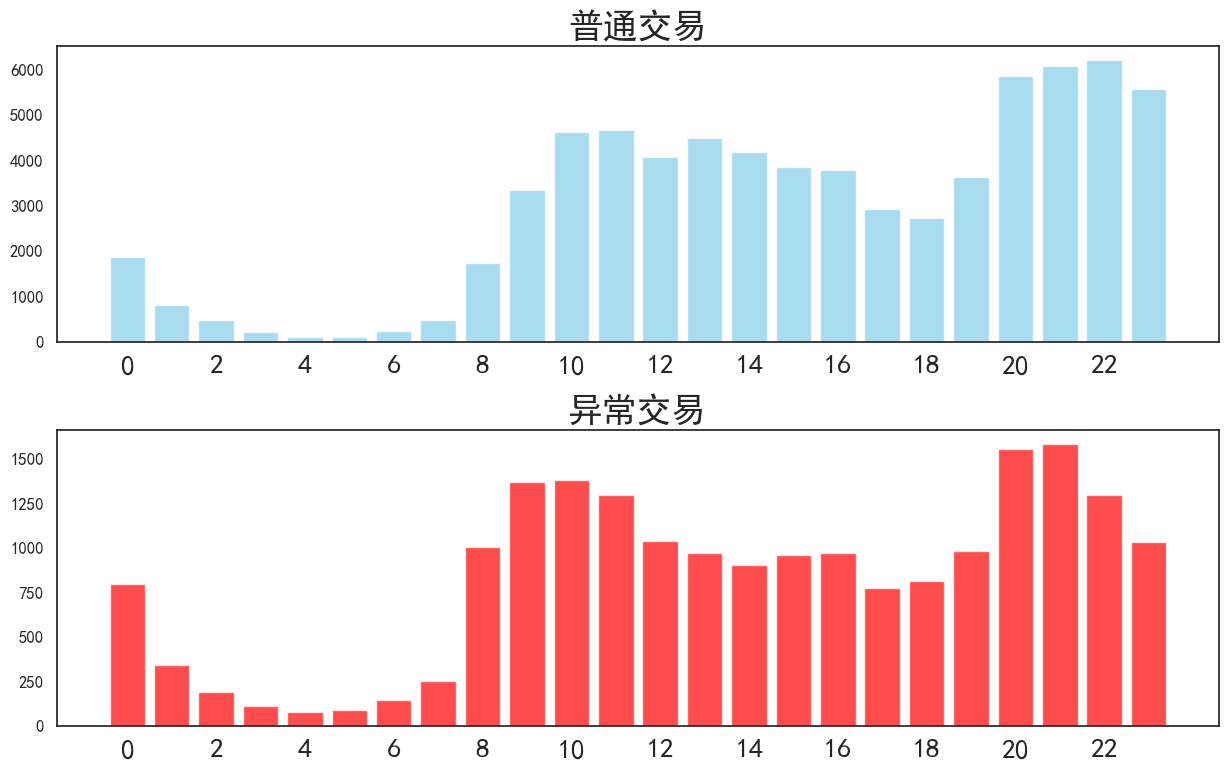

In [118]:
import seaborn as sns
plt.figure(figsize=(15,9),dpi=100)
sns.set(style='white',font='Simhei',font_scale=1.1)

plt.subplot(211)
plt.bar(OrderTime_normal.index,OrderTime_normal.values,color='skyblue',alpha=0.7)
plt.title('普通交易',fontsize=25)
plt.xticks(ticks=range(0,24,2),fontsize=20)

plt.subplot(212)
plt.bar(OrderTime_ab.index,OrderTime_ab.values,color='red',alpha=0.7)
plt.title('异常交易',fontsize=25)
plt.xticks(ticks=range(0,24,2),fontsize=20)

plt.subplots_adjust(hspace=0.3)
plt.show()

In [119]:
# 特征编码
train['下单分钟'] = train['下单时间'].apply(lambda x:int(int(x[3:5])>30))
train['下单小时'] = train['下单时间'].apply(lambda x:int(x[:2]))

test['下单分钟'] = test['下单时间'].apply(lambda x:int(int(x[3:5])>30))
test['下单小时'] = test['下单时间'].apply(lambda x:int(x[:2]))

In [120]:
# 删除下单时间列
train.drop(columns='下单时间',inplace=True)
test.drop(columns='下单时间',inplace=True)

In [121]:
# 支付方式：支付渠道的异常风险评估
train['支付方式'].value_counts()

合并支付    71893
货到付款    18321
当当支付     1226
在线支付      290
账户余额      138
Name: 支付方式, dtype: int64

In [122]:
# 评估指标：异常率
# 异常率=异常交易/全部交易 
train.groupby(['支付方式'])['异常'].mean()

支付方式
合并支付    0.275173
在线支付    0.251724
当当支付    0.044861
账户余额    0.028986
货到付款    0.000000
Name: 异常, dtype: float64

In [123]:
dfPay = train.groupby(['支付方式'])['异常'].mean().sort_values(ascending=False)

In [124]:
dfPay.index

Index(['合并支付', '在线支付', '当当支付', '账户余额', '货到付款'], dtype='object', name='支付方式')

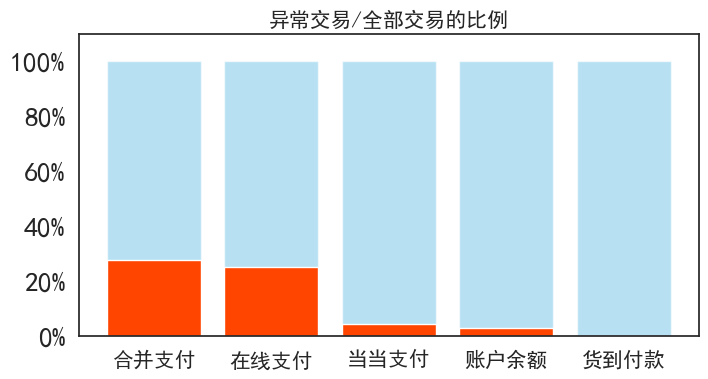

In [125]:
plt.figure(figsize=(8,4),dpi=100)
sns.set(style='white',font='Simhei',font_scale=1.1)

plt.bar(dfPay.index,1.0,color='skyblue',alpha=0.6)
plt.bar(dfPay.index,dfPay.values,color='orangered',alpha=1)
plt.title('异常交易/全部交易的比例',fontsize=15)
plt.ylim(0,1.1)
plt.yticks(ticks=np.arange(0,1.1,step=0.2),labels=['0%','20%','40%','60%','80%','100%'],fontsize=20)
plt.xticks(range(len(dfPay)),['合并支付','在线支付','当当支付','账户余额','货到付款'],fontsize=15)
plt.show()

In [126]:
def GroupByFeature(column,train,test,newcolumn):
    dic = dict(train.groupby(column)['异常'].mean())
    
    #建立新特征
    train[newcolumn] = train[column].map(dic)
    #测试集上映射的数字是从训练集上 计算出来的
    test[newcolumn] = test[column].map(dic)
    
    return train,test

In [127]:
# map(字典)#通过键值对，映射到列中

In [128]:
train,test = GroupByFeature('支付方式',train,test,'支付方式异常率')

In [129]:
# 特征编码
def encodePay(column,train,test):
    #用于转化支付方式
    
    dic={}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
        
    #编码训练集
    train[column] = train[column].map(dic)
    
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train,test

In [130]:
train,test = encodePay('支付方式',train,test)

In [131]:
# 按省份处理
ChinaCity = pd.read_excel(r'D:\data\python\data\abnormal\ChinaCity.xls',index_col=1)

In [132]:
# 化为series,方便字典的建立
ChinaCity['省份']

市级
北京市        北京市
天津市        天津市
石家庄市       河北省
唐山市        河北省
秦皇岛市       河北省
          ... 
云南省其他城市    云南省
福建省其他城市    福建省
山西省其他城市    山西省
山东省其他城市    山东省
江西省其他城市    江西省
Name: 省份, Length: 412, dtype: object

In [133]:
dict(ChinaCity['省份'])

{'北京市': '北京市',
 '天津市': '天津市',
 '石家庄市': '河北省',
 '唐山市': '河北省',
 '秦皇岛市': '河北省',
 '邯郸市': '河北省',
 '邢台市': '河北省',
 '保定市': '河北省',
 '张家口市': '河北省',
 '承德市': '河北省',
 '沧州市': '河北省',
 '廊坊市': '河北省',
 '衡水市': '河北省',
 '太原市': '山西省',
 '大同市': '山西省',
 '阳泉市': '山西省',
 '长治市': '山西省',
 '晋城市': '山西省',
 '朔州市': '山西省',
 '忻州市': '山西省',
 '吕梁市': '山西省',
 '晋中市': '山西省',
 '临汾市': '山西省',
 '运城市': '山西省',
 '呼和浩特市': '内蒙古自治区',
 '包头市': '内蒙古自治区',
 '乌海市': '内蒙古自治区',
 '赤峰市': '内蒙古自治区',
 '呼伦贝尔市': '内蒙古自治区',
 '兴安盟': '内蒙古自治区',
 '通辽市': '内蒙古自治区',
 '锡林郭勒盟': '内蒙古自治区',
 '乌兰察布市': '内蒙古自治区',
 '鄂尔多斯市': '内蒙古自治区',
 '巴彦淖尔市': '内蒙古自治区',
 '阿拉善盟': '内蒙古自治区',
 '沈阳市': '辽宁省',
 '大连市': '辽宁省',
 '鞍山市': '辽宁省',
 '抚顺市': '辽宁省',
 '本溪市': '辽宁省',
 '丹东市': '辽宁省',
 '锦州市': '辽宁省',
 '营口市': '辽宁省',
 '阜新市': '辽宁省',
 '辽阳市': '辽宁省',
 '盘锦市': '辽宁省',
 '铁岭市': '辽宁省',
 '朝阳市': '辽宁省',
 '葫芦岛市': '辽宁省',
 '长春市': '吉林省',
 '吉林市': '吉林省',
 '四平市': '吉林省',
 '辽源市': '吉林省',
 '通化市': '吉林省',
 '白山市': '吉林省',
 '松原市': '吉林省',
 '白城市': '吉林省',
 '延边州': '吉林省',
 '哈尔滨市': '黑龙江省',
 '齐齐哈尔市': '黑龙江省',
 '鸡西市': '黑龙江省',
 '鹤岗市': '黑龙

In [134]:
train['省份'] = train['城市'].map(dict(ChinaCity['省份']))

In [135]:
# 确认map后没有缺失值
train['省份'].isnull().sum()

0

In [136]:
# 计算每个省份的异常率
df = train.groupby(['省份'])['异常'].mean().sort_values(ascending=False)

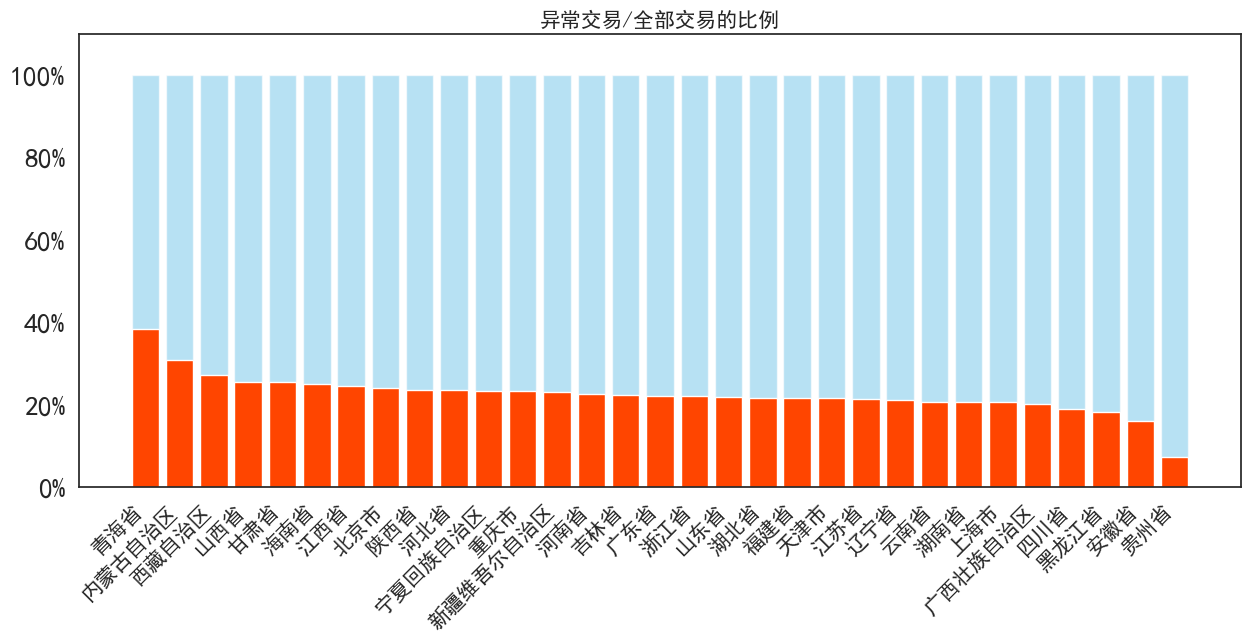

In [137]:
plt.figure(figsize=(15,6),dpi=100)
sns.set(style='white',font='Simhei',font_scale=1.1)

plt.bar(df.index,1.0,color='skyblue',alpha=0.6)
plt.bar(df.index,df.values,color='orangered',alpha=1)
plt.title('异常交易/全部交易的比例',fontsize=15)
plt.ylim(0,1.1)
plt.yticks(ticks=np.arange(0,1.1,step=0.2),labels=['0%','20%','40%','60%','80%','100%'],fontsize=20)
plt.xticks(range(len(df)),df.index,fontsize=15,rotation=45,ha='right')
plt.show()

In [138]:
# 创造特征省份
train['省份'] = train['城市'].map(dict(ChinaCity['省份']))
test['省份'] = test['城市'].map(dict(ChinaCity['省份']))

In [139]:
# 检查是否需要在特征构建函数上稍作修改
def GroupByFeature(column,train,test,newcolumn):
    dic = dict(train.groupby(column)['异常'].mean())
    
    #建立新特征
    train[newcolumn] = train[column].map(dic)
    #测试集上映射的数字是从训练集上 计算出来的
    test[newcolumn] = test[column].map(dic)
    
    return train,test

In [140]:
train,test = GroupByFeature('省份',train,test,'省份异常率')

In [141]:
# 确认训练集，测试集没有缺失值
train.isnull().sum().sum()

0

In [142]:
test['省份'].isnull().sum()

0

In [143]:
# test[test['省份'].isnull().values==True]

In [144]:
# 特征编码
# 城市与省份
def encodeCityProvince(column,train,test):
    dic={}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
    #编码训练集
    train[column] = train[column].map(dic)
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train,test

In [145]:
for i in ['城市','省份']:
    train,test = encodeCityProvince(i,train,test)

In [146]:
# 检查缺失值
test.loc[test['城市'].isnull(),'城市']

9393    NaN
11613   NaN
35611   NaN
Name: 城市, dtype: float64

In [147]:
test.loc[test['城市'].isnull(),'城市'] = 362

In [148]:
df = train.groupby('商品一级类别')['异常'].mean()

In [149]:
df = df.sort_values()

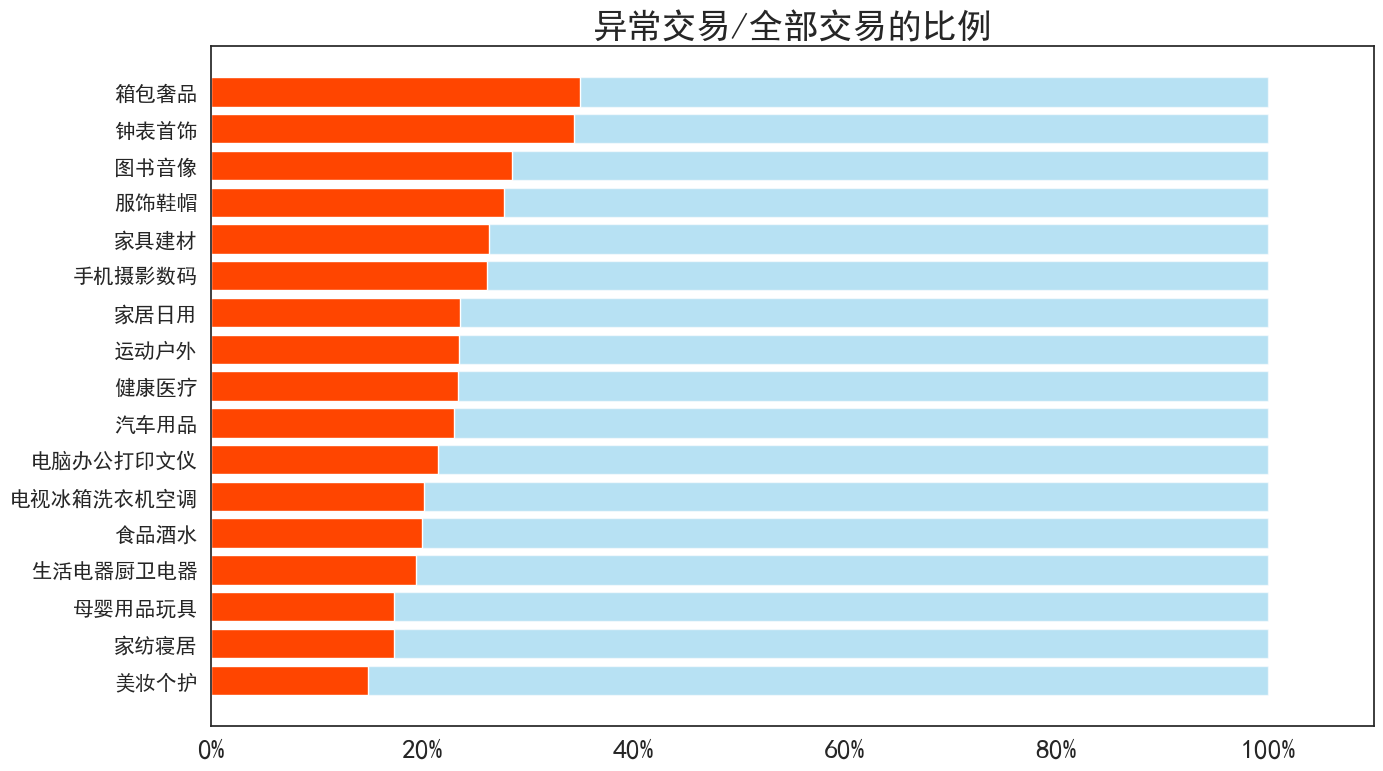

In [150]:
plt.figure(figsize=(15,9),dpi=100)
sns.set(style='white',font='Simhei',font_scale=1.1)

plt.barh(df.index,1,color='skyblue',alpha=0.6)
plt.barh(df.index,df.values,color='orangered',alpha=1)
plt.title('异常交易/全部交易的比例',fontsize=25)
plt.xlim(0,1.1)
plt.xticks(ticks=np.arange(0,1.2,0.2),labels=['0%','20%','40%','60%','80%','100%'],fontsize=20)
plt.yticks(range(17),df.index,fontsize=15)
plt.show()

In [151]:
df2 = train.groupby('订单渠道')['异常'].mean().sort_values(ascending=True)

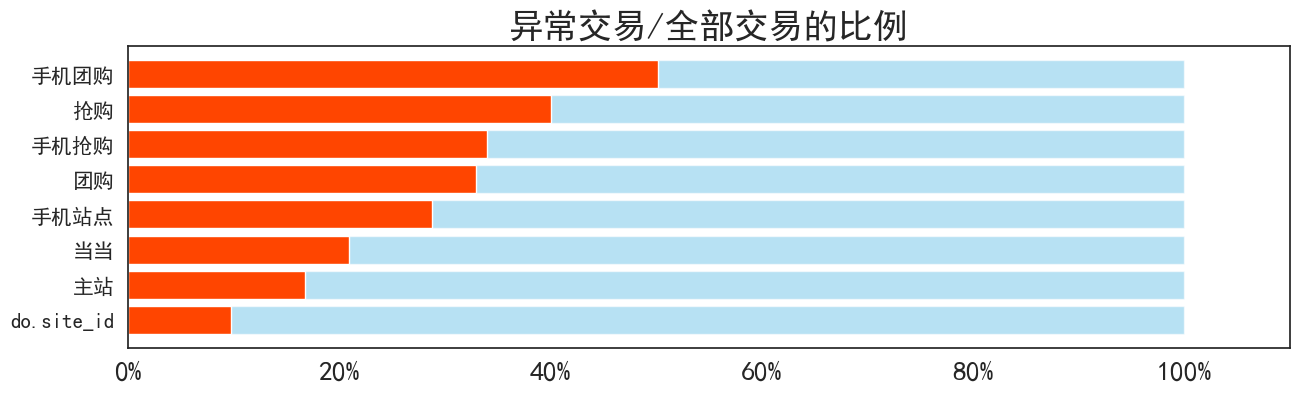

In [152]:
plt.figure(figsize=(15,4),dpi=100)
sns.set(style='white',font='Simhei',font_scale=1.1)

plt.barh(df2.index,1,color='skyblue',alpha=0.6)
plt.barh(df2.index,df2.values,color='orangered',alpha=1)
plt.title('异常交易/全部交易的比例',fontsize=25)
plt.xlim(0,1.1)
plt.xticks(ticks=np.arange(0,1.2,0.2),labels=['0%','20%','40%','60%','80%','100%'],fontsize=20)
plt.yticks(range(len(df2)),df2.index,fontsize=15)
plt.show()

In [153]:
train.groupby('商品所属渠道')['异常'].mean().sort_values(ascending=False)

商品所属渠道
POP    0.294727
GO     0.178732
Name: 异常, dtype: float64

In [154]:
# POP店铺异常率更高，官方自营店铺的异常率更低

In [155]:
# 加入新特征
for i in ['商品一级类别','商品所属渠道','订单渠道']:
    train,test = GroupByFeature(i,train,test,i+'异常率')

In [156]:
# 特征编码
def EasyEncode(column,train,test):
    dic={}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
    #编码训练集
    train[column] = train[column].map(dic)
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train,test

In [157]:
for i in ['商品一级类别','商品所属渠道','订单渠道']:
    train,test = EasyEncode(i,train,test)

In [158]:
ab = train.loc[train['异常']==1,'订单金额']
normal = train.loc[train['异常']!=1,'订单金额']

In [159]:
from sklearn.preprocessing import KBinsDiscretizer as KBD

In [160]:
# 从训练集中学习箱子的上界/下界

In [161]:
enc = KBD(n_bins=10
          ,encode='ordinal'#0-9还是one-hot
          ,strategy='kmeans')#按照Kmeans聚类进行分箱

In [162]:
enc = enc.fit(pd.DataFrame(train['订单金额']))

In [163]:
train['金额分箱'] = enc.transform(pd.DataFrame(train['订单金额']))

In [164]:
df = pd.DataFrame(index=train.groupby(['金额分箱'])['订单金额'].max().index)
df['下界']=train.groupby(['金额分箱'])['订单金额'].min()
df['上界']=train.groupby(['金额分箱'])['订单金额'].max()

In [165]:
df#从第五个箱子开始，上下界不再是连在一起的了，789箱子中只有唯一数值

,下界,上界
金额分箱,,
0.0,0.5,954.0
1.0,956.0,2970.0
2.0,2980.0,6638.0
3.0,6666.0,12999.0
4.0,13189.0,23998.0
5.0,25790.0,45490.0
6.0,71980.0,99840.0
7.0,155999.0,155999.0
8.0,383000.0,383000.0


In [166]:
# 将分箱结果放置到训练集和测试集中
train['金额分箱'] = enc.transform(pd.DataFrame(train['订单金额']))
test['金额分箱'] = enc.transform(pd.DataFrame(test['订单金额']))

In [167]:
# 将分箱聚合后的平均金额放到训练集和测试集中
dic = dict(train.groupby(['金额分箱'])['订单金额'].mean())

train['金额分箱均值'] = train['金额分箱'].map(dic)
test['金额分箱均值'] = test['金额分箱'].map(dic)

In [168]:
# 将分箱聚合后异常率放到训练集和测试集中
dic = dict(train.groupby(['金额分箱'])['异常'].mean())

train['金额分箱异常率'] = train['金额分箱'].map(dic)
test['金额分箱异常率'] = test['金额分箱'].map(dic)

商品销售数量

In [169]:
ab_1 = train.loc[train['异常']==1,'商品销售数量']
normal_1 = train.loc[train['异常']!=1,'商品销售数量']

In [170]:
enc = KBD(n_bins=10
          ,encode='ordinal'#0-9还是one-hot
          ,strategy='kmeans')#按照Kmeans聚类进行分箱

In [171]:
enc = enc.fit(pd.DataFrame(train['商品销售数量']))

In [172]:
train['销量分箱'] = enc.transform(pd.DataFrame(train['商品销售数量']))

In [173]:
df = pd.DataFrame(index=train.groupby(['销量分箱'])['商品销售数量'].max().index)
df['下界']=train.groupby(['销量分箱'])['商品销售数量'].min()
df['上界']=train.groupby(['销量分箱'])['商品销售数量'].max()

In [174]:
# 将分箱结果放置到训练集和测试集中
train['销量分箱'] = enc.transform(pd.DataFrame(train['商品销售数量']))
test['销量分箱'] = enc.transform(pd.DataFrame(test['商品销售数量']))

In [175]:
# 将分箱聚合后的平均销量放到训练集和测试集中
dic = dict(train.groupby(['销量分箱'])['商品销售数量'].mean())

train['销量分箱均值'] = train['销量分箱'].map(dic)
test['销量分箱均值'] = test['销量分箱'].map(dic)

In [176]:
# 将分箱聚合后异常率放到训练集和测试集中
dic = dict(train.groupby(['销量分箱'])['异常'].mean())

train['销量分箱异常率'] = train['销量分箱'].map(dic)
test['销量分箱异常率'] = test['销量分箱'].map(dic)

7、多类别字段预处理

In [177]:
# 下单用户总人数
len(train['下单用户ID'].unique())

58488

In [178]:
# 其中只下了一单的人数
(train['下单用户ID'].value_counts()==1).sum()

44137

In [179]:
# 提取下单次数超过1次的用户，计算异常率
MultipleBuy = train.groupby(['下单用户ID'])['异常'].mean()[train['下单用户ID'].value_counts()>1]

In [180]:
MultipleBuy.describe([0.6,0.7,0.8,0.9,0.99])

count    14351.000000
mean         0.258921
std          0.347363
min          0.000000
50%          0.000000
60%          0.250000
70%          0.500000
80%          0.500000
90%          1.000000
99%          1.000000
max          1.000000
Name: 异常, dtype: float64

In [181]:
train.groupby(['商品ID'])['商品销售数量'].sum().describe()

count    17252.000000
mean         6.321528
std         37.765090
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2606.000000
Name: 商品销售数量, dtype: float64

In [182]:
ProductID = train.groupby(['商品ID'])['异常'].mean()[train.groupby(['商品ID'])['商品销售数量'].sum()>=10]

In [183]:
ProductID.describe()

count    1748.000000
mean        0.229465
std         0.208118
min         0.000000
25%         0.083333
50%         0.176471
75%         0.324169
max         1.000000
Name: 异常, dtype: float64

In [184]:
train.groupby(['品牌'])['商品销售数量'].sum().describe()

count    2507.000000
mean       43.501795
std       197.462143
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
max      3904.000000
Name: 商品销售数量, dtype: float64

In [185]:
BrandID = train.groupby(['品牌'])['异常'].mean()[train.groupby(['品牌'])['商品销售数量'].sum()>=10]

In [186]:
BrandID.describe()

count    882.000000
mean       0.246267
std        0.167831
min        0.000000
25%        0.133333
50%        0.217391
75%        0.333333
max        1.000000
Name: 异常, dtype: float64

In [187]:
df = pd.DataFrame(index=train['下单用户ID'].unique())
df['用户异常率'] = -1

In [188]:
df.loc[MultipleBuy.index,'用户异常率'] = MultipleBuy

In [189]:
train['用户异常率'] = train['下单用户ID'].map(dict(df['用户异常率']))

对测试集，检查是否有训练集从未出现过的用户

In [190]:
dic={}
for i in test['下单用户ID']:
    if i in MultipleBuy.index:
        dic[i] = MultipleBuy[i]
    else:#没出现在训练集中/出现了，但交易量不足
        dic[i] = -1

In [191]:
test['用户异常率'] = test['下单用户ID'].map(dic)

In [192]:
# 将上述流程打包成函数
def GroupbyFeature2(column,train,test,newcolumn,ratio):
    #创建字典
    df = pd.DataFrame(index=train[column].unique())
    df[newcolumn] = -1
    df.loc[ratio.index,newcolumn] = ratio
    
    #映射到训练集
    train[newcolumn] = train[column].map(dict(df[newcolumn]))
    
    #检查测试集样本是否有从未出现在训练集中
    dic={}
    for i in test[column]:
        if i in ratio.index:
            dic[i] = ratio[i]
        else:#没出现在训练集中/出现了，但交易量不足
            dic[i] = -1
    #映射到测试集
    test[newcolumn] = test[column].map(dic)
    
    return train,test

In [193]:
train,test = GroupbyFeature2('商品ID',train,test,'商品异常率',ProductID)
train,test = GroupbyFeature2('品牌',train,test,'品牌异常率',BrandID)

In [194]:
# 特征编码
def ComplexEncode(column,train,test):
    #找出训练集上的字典
    dic={}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
    #使用字典映射到原始特征，编码原始特征
    train[column] = train[column].map(dic)
    
    #转化测试集
    #先判断测试集中是否出现了在训练集中没见过的类别
    test_new = test[column].map(dic)
    
    while test_new.isnull().sum()>0:
        print('测试集中出现训练集中从未出现的类别')
        unknowncate = test.loc[test_new.isnull(),column].unique()
        for i in unknowncate:
            dic[i] = len(dic)
        test_new = test[column].map(dic)
        
    test[column] = test_new
    
    return train,test

In [195]:
for column in ['下单用户ID','商品ID','品牌']:
    train,test = ComplexEncode(column,train,test)

测试集中出现训练集中从未出现的类别
测试集中出现训练集中从未出现的类别
测试集中出现训练集中从未出现的类别


In [196]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,...,订单渠道异常率,金额分箱,金额分箱均值,金额分箱异常率,销量分箱,销量分箱均值,销量分箱异常率,用户异常率,商品异常率,品牌异常率
0,1,4283851335,5,1,13080,199,766000.0,200,1,0,...,0.167849,9.0,766000.000000,1.000000,9.0,200.000000,1.000000,0.133333,1.000000,0.340804
1,1,4281111595,2,1,15075,1856,100.0,100,1,0,...,0.167849,0.0,136.243951,0.203899,8.0,99.888889,0.111111,0.333333,0.333333,0.250000
2,0,4106833871,3,1,15212,676,8800.0,100,1,0,...,0.167849,3.0,9128.895833,0.264881,8.0,99.888889,0.111111,0.000000,0.238462,0.286842
3,0,4253622967,10,1,11454,1568,880.0,100,1,0,...,0.167849,0.0,136.243951,0.203899,8.0,99.888889,0.111111,-1.000000,0.296296,0.298387
4,0,4276159555,3,0,4800,262,4900.0,100,1,0,...,0.167849,2.0,4165.485313,0.326309,8.0,99.888889,0.111111,0.133333,0.119565,0.179739


模型构筑：使用模型融合进行预测

In [197]:
# 按特征工程后数据进行基础建模
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [198]:
Xtrain = train.iloc[:,1:]
Xtest = test.iloc[:,1:]
Ytrain  = train.iloc[:,0]
Ytest  = test.iloc[:,0]

In [199]:
# 生成xgboost专用的训练集和测试集
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [200]:
# 使用随机森林和GBDC分别进行预测观察结果
rf = RFC(n_estimators=200,random_state=1412)
gbdc = GBC(n_estimators=200,random_state=1412)

In [201]:
# 使用建立benchmark时一模一样的最简单的KFold交叉验证，随机种子也保持一致
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [202]:
result_gbdc_cv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv)

In [203]:
result_gbdc_cv.mean()

0.8798058075373152

In [204]:
result_gbdc_cv.var()

1.7024183253913011e-06

In [205]:
result_rf_cv = cross_val_score(rf,Xtrain,Ytrain,cv=cv)

In [206]:
result_rf_cv.mean()

0.8751905015162647

In [207]:
result_rf_cv.var()

6.162640165881308e-07

In [208]:
param = {'objective':'binary:logistic'#用逻辑回归的损失函数作为目标函数（交叉熵损失函数）
        ,'eval_metric':'error'#不支持准确率，使用错误率
        ,'seed':1412}#随机数种子

In [209]:
# 使用xgboost查看结果
xgbcv = xgb.cv(param,dtrain,num_boost_round=200,nfold=5,seed=1412,shuffle=True)
#xgboost与sklearn使用的随机性系统不同
#在相同的随机数种子下，交叉验证所划分的数据集是不同的

In [210]:
xgbcv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.125561,0.000901,0.127161,0.001774
1,0.123054,0.000910,0.124799,0.001227
2,0.122369,0.000814,0.124080,0.000671
3,0.121359,0.000337,0.123645,0.001490
4,0.120858,0.000701,0.123329,0.001151
...,...,...,...,...
195,0.064348,0.001308,0.123503,0.001246
196,0.064160,0.001238,0.123623,0.001275
197,0.063888,0.001327,0.123601,0.001250
198,0.063738,0.001302,0.123514,0.001140


In [211]:
1-xgbcv.loc[199,'test-error-mean']

0.8765620402738741

In [212]:
# AUC分数
#每次训练完毕后需要重新设置类，否则会在原来的基础上进行训练
rf = RFC(n_estimators=200,random_state=1412)
gbdc = GBC(n_estimators=200,random_state=1412)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [213]:
result_rf_cv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring='roc_auc')

In [214]:
result_rf_cv.mean()

0.9271102543738359

In [215]:
result_rf_cv.var()

1.6078274716054552e-06

In [216]:
result_gbdc_cv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring='roc_auc')

In [217]:
result_gbdc_cv.mean()

0.9350647769330553

In [218]:
result_gbdc_cv.var()

4.985989871545428e-07

In [219]:
param = {'objective':'binary:logistic'#用逻辑回归的损失函数作为目标函数（交叉熵损失函数）
        ,'eval_metric':'auc'#模型评估指标
        ,'seed':1412}#随机数种子

In [220]:
# 使用xgboost查看结果
xgbcv = xgb.cv(param,dtrain,num_boost_round=200,nfold=5,seed=1412,shuffle=True)
#xgboost与sklearn使用的随机性系统不同
#在相同的随机数种子下，交叉验证所划分的数据集是不同的

In [221]:
xgbcv.loc[199,'test-auc-mean']

0.9331171477276353

In [222]:
xgbcv.loc[199,'test-auc-std']**2

5.027558841342809e-07

#### 按照AUC，使用学习曲线进行调参
######  样本不平衡

In [223]:
(Ytrain==1).sum()/Ytrain.shape[0]

0.2167784212130448

In [224]:
Xtrain.shape[0]/(2*np.bincount(Ytrain))#约等于1:3

array([0.63838895, 2.30650264])

In [225]:
for weights in [{0:0.5,1:0.5},{0:0.5,1:1},'balanced',{0:0.5,1:2},{0:0.5,1:2.5},{0:0.5,1:3}]:
    #比例分别为1:1,1:2,1:3,1:4,1:5
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    rf = RFC(n_estimators=200,random_state=1412,class_weight=weights)
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    print(weights)
    print('\t rf_mean:{:.5f}'.format(rfcv.mean()))
    print('\t rf_var:{}'.format(rfcv.var()))

{0: 0.5, 1: 0.5}
	 rf_mean:0.92711
	 rf_var:1.6078274716054552e-06
{0: 0.5, 1: 1}
	 rf_mean:0.92781
	 rf_var:1.8249276246385685e-06
balanced
	 rf_mean:0.92802
	 rf_var:1.5927988731141121e-06
{0: 0.5, 1: 2}
	 rf_mean:0.92817
	 rf_var:2.4615356108817417e-06
{0: 0.5, 1: 2.5}
	 rf_mean:0.92822
	 rf_var:1.995297062898542e-06
{0: 0.5, 1: 3}
	 rf_mean:0.92819
	 rf_var:7.815637153552289e-07


In [226]:
for weights in [0.5,0.3,0.1]:
    num_round = 200
    param = {'objective':'binary:logistic','eval_metric':'auc'
             ,'scale_pos_weight':weights}
    xgbcv = xgb.cv(param,dtrain,num_boost_round=num_round
                   ,nfold=5,seed=1412,shuffle=True)
    
    print(weights)
    print('\t xgb_mean:{:.5f}'.format(xgbcv.loc[num_round-1,'test-auc-mean']))
    print('\t xgb_std:{}'.format((xgbcv.loc[num_round-1,'test-auc-std'])**2))

0.5
	 xgb_mean:0.93378
	 xgb_std:7.957847222655731e-07
0.3
	 xgb_mean:0.93378
	 xgb_std:6.515941772162028e-07
0.1
	 xgb_mean:0.93483
	 xgb_std:1.1014901297317455e-06


In [227]:
for weights in [0.05,0.03,0.01]:
    num_round = 200
    param = {'objective':'binary:logistic','eval_metric':'auc'
             ,'scale_pos_weight':weights}
    xgbcv = xgb.cv(param,dtrain,num_boost_round=num_round
                   ,nfold=5,seed=1412,shuffle=True)
    
    print(weights)
    print('\t xgb_mean:{:.5f}'.format(xgbcv.loc[num_round-1,'test-auc-mean']))
    print('\t xgb_std:{}'.format((xgbcv.loc[num_round-1,'test-auc-std'])**2))

0.05
	 xgb_mean:0.93499
	 xgb_std:1.418242009439362e-07
0.03
	 xgb_mean:0.93523
	 xgb_std:8.191463106040282e-07
0.01
	 xgb_mean:0.93515
	 xgb_std:1.2536964882767838e-06


In [228]:
rf  = RFC(n_estimators=200,random_state=1412,class_weight={0:0.5,1:2.5})
gbdc = GBC(n_estimators=200,random_state=1412)
param = {'objective':'binary:logistic','eval_metric':'auc','scale_pos_weight':0.03}

树的数量

In [229]:
# 减少树

In [230]:
rfcvTotal = []
gbdcvTotal = []
xgbcvTotal = []
for num_round in [50,100,150,200]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    
    rf = RFC(n_estimators=num_round,random_state=1412,class_weight={0:0.5,1:2.5})
    gbdc = GBC(n_estimators=num_round,random_state=1412)
    param = {'objective':'binary:logistic'
             ,'eval_metric':'auc','scale_pos_weight':0.03}
    
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    rfcvTotal.append(rfcv.mean())
    
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    gbdcvTotal.append(gbdcv.mean())
    
    xgbcv = xgb.cv(param,dtrain,num_boost_round=num_round
                   ,nfold=5,seed=1412,shuffle=True)
    xgbcvTotal.append(xgbcv.loc[num_round-1,'test-auc-mean'])
    
    print(num_round)
    print('\t rf:{:.5f}'.format(rfcv.mean()))
    print('\t gbd:{:.5f}'.format(gbdcv.mean()))
    print('\t xgb:{:.5f}'.format(xgbcv.loc[num_round-1,'test-auc-mean']))

50
	 rf:0.92493
	 gbd:0.92930
	 xgb:0.93613
100
	 rf:0.92702
	 gbd:0.93333
	 xgb:0.93616
150
	 rf:0.92781
	 gbd:0.93439
	 xgb:0.93582
200
	 rf:0.92822
	 gbd:0.93506
	 xgb:0.93523


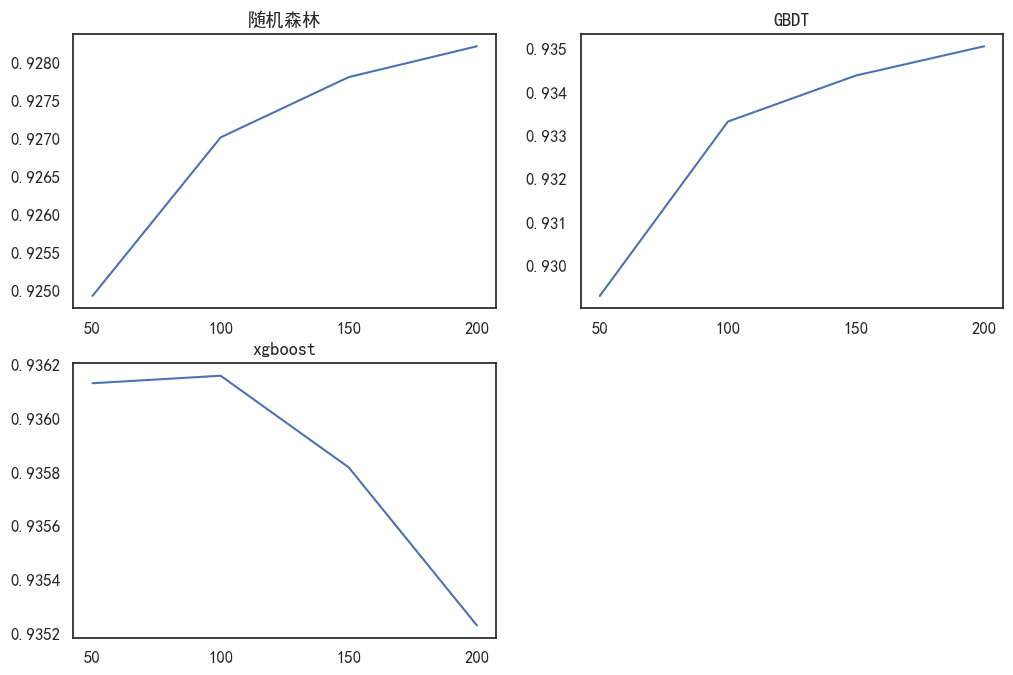

In [231]:
plt.figure(figsize=(12,8),dpi=100)
plt.subplot(221)
plt.plot([50,100,150,200],rfcvTotal)
plt.xticks([50,100,150,200])
plt.title('随机森林')

plt.subplot(222)
plt.plot([50,100,150,200],gbdcvTotal)
plt.xticks([50,100,150,200])
plt.title('GBDT')

plt.subplot(223)
plt.plot([50,100,150,200],xgbcvTotal)
plt.xticks([50,100,150,200])

plt.title('xgboost')
plt.show()

对于xgboost来说，大约100棵树是理想的

对于随机森林和GBDT来说，随着树的持续增长，交叉验证中的auc分数还在增长

对xgboost进行50-150之间的精密调参，而对森林与gbdt继续增加树的数量

In [232]:
xgbcvTotal_2 = []
for num_round in range(50,150,5):
    param = {'objective':'binary:logistic'
             ,'eval_metric':'auc','scale_pos_weight':0.03}
    xgbcv = xgb.cv(param,dtrain,num_boost_round=num_round
                   ,nfold=5,seed=1412,shuffle=True)
    test_auc = xgbcv.loc[num_round-1,'test-auc-mean']
    xgbcvTotal_2.append(test_auc)
    print('\t xgb:{:.5f}'.format(test_auc))

	 xgb:0.93613
	 xgb:0.93622
	 xgb:0.93619
	 xgb:0.93628
	 xgb:0.93636
	 xgb:0.93634
	 xgb:0.93633
	 xgb:0.93625
	 xgb:0.93622
	 xgb:0.93619
	 xgb:0.93616
	 xgb:0.93619
	 xgb:0.93613
	 xgb:0.93615
	 xgb:0.93609
	 xgb:0.93602
	 xgb:0.93601
	 xgb:0.93597
	 xgb:0.93589
	 xgb:0.93585


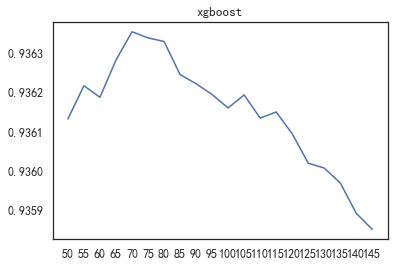

In [233]:
plt.plot(range(50,150,5),xgbcvTotal_2)
plt.xticks(range(50,150,5))
plt.title('xgboost')
plt.show()

可以发现最高auc出现第70棵树时，auc达到了0.93636，对于xgboost确定参数num_boost_round=70

In [234]:
rf_r = []
gbdc_r = []
for num_round in [300,400,500]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    rf = RFC(n_estimators=num_round,random_state=1412,class_weight={0:0.5,1:2.5})
    gbdc = GBC(n_estimators=num_round,random_state=1412)

    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    rf_r.append(rfcv.mean())
    gbdc_r.append(gbdcv.mean())
    print(num_round)
    print('\t rf:{:.5f}'.format(rfcv.mean()))
    print('\t gbd:{:.5f}'.format(gbdcv.mean()))

300
	 rf:0.92864
	 gbd:0.93593
400
	 rf:0.92888
	 gbd:0.93632
500
	 rf:0.92892
	 gbd:0.93654


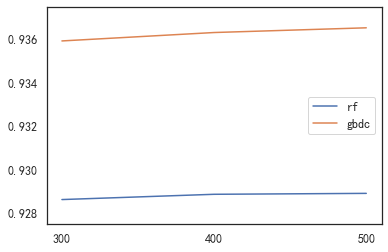

In [235]:
plt.plot([300,400,500],rf_r,label='rf')
plt.plot([300,400,500],gbdc_r,label='gbdc')
plt.xticks([300,400,500])
plt.legend()
plt.ylim(0.9275,0.9375)
plt.show()

In [236]:
gbdc_r1 = []
xgb_r1= []
for lr in [0.05,0.1,0.3,0.5]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    gbdc = GBC(n_estimators=200
              ,learning_rate=lr
              ,random_state=1412)
    param = {'objective':'binary:logistic'
             ,'eval_metric':'auc','scale_pos_weight':0.03,'eta':lr}
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    xgbcv = xgb.cv(param,dtrain,num_boost_round=70,nfold=5,seed=1412,shuffle=True)
    test_auc = xgbcv.loc[69,'test-auc-mean']
    
    gbdc_r1.append(gbdcv.mean())
    xgb_r1.append(test_auc)
    print(lr)
    print('\t gbd:{:.5f}'.format(gbdcv.mean()))
    print('\t xgd:{:.5f}'.format(test_auc))

0.05
	 gbd:0.93331
	 xgd:0.92417
0.1
	 gbd:0.93506
	 xgd:0.93437
0.3
	 gbd:0.93591
	 xgd:0.93636
0.5
	 gbd:0.93433
	 xgd:0.93497


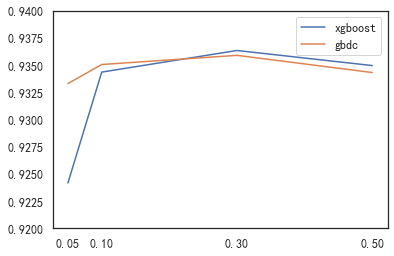

In [237]:
plt.plot([0.05,0.1,0.3,0.5],xgb_r1,label='xgboost')
plt.plot([0.05,0.1,0.3,0.5],gbdc_r1,label='gbdc')
plt.xticks([0.05,0.1,0.3,0.5])
plt.legend()
plt.ylim(0.92,0.94)
plt.show()


In [238]:
gbdc_result = []
xgb_result= []
for lr in np.linspace(0.25,0.35,10):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    gbdc = GBC(n_estimators=200
              ,learning_rate=lr
              ,random_state=1412)
    param = {'objective':'binary:logistic'
             ,'eval_metric':'auc','scale_pos_weight':0.03,'eta':lr}
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    xgbcv = xgb.cv(param,dtrain,num_boost_round=70,nfold=5,seed=1412,shuffle=True)
    test_auc = xgbcv.loc[69,'test-auc-mean']
    
    gbdc_result.append(gbdcv.mean())
    xgb_result.append(test_auc)

GBDC最高分是0.93625,最高分对应的学习率是0.2611111111111111
XGB最高分是0.93660,最高分对应的学习率是0.25


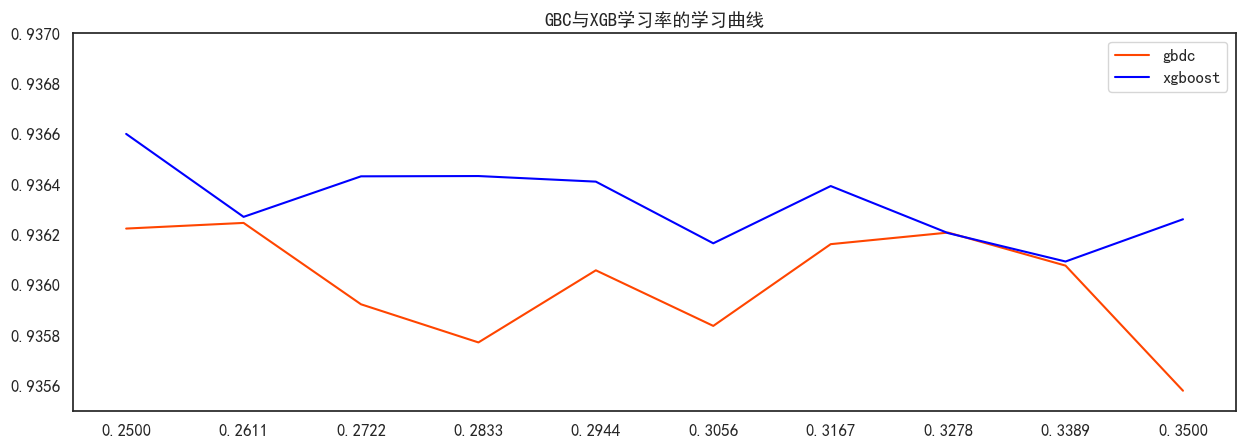

In [239]:
lr_range = np.linspace(0.25,0.35,10)
plt.figure(figsize=(15,5),dpi=100)
plt.plot(lr_range,gbdc_result
         ,c='orangered'
         ,label='gbdc')
plt.plot(lr_range,xgb_result
         ,c='blue'
         ,label='xgboost')
print('GBDC最高分是{:.5f},最高分对应的学习率是{}'.format(max(gbdc_result),lr_range[gbdc_result.index(max(gbdc_result))]))
print('XGB最高分是{:.5f},最高分对应的学习率是{}'.format(max(xgb_result),lr_range[xgb_result.index(max(xgb_result))]))

plt.xticks(lr_range)
plt.title('GBC与XGB学习率的学习曲线')
plt.ylim((0.9355,0.9370))
plt.legend()
plt.show()

In [240]:
gbdc_result_1 = []
xgb_result_1= []
for lr in np.linspace(0.235,0.265,10):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    gbdc = GBC(n_estimators=200
              ,learning_rate=lr
              ,random_state=1412)
    param = {'objective':'binary:logistic'
             ,'eval_metric':'auc','scale_pos_weight':0.03,'eta':lr}
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    xgbcv = xgb.cv(param,dtrain,num_boost_round=70,nfold=5,seed=1412,shuffle=True)
    test_auc = xgbcv.loc[69,'test-auc-mean']
    
    gbdc_result_1.append(gbdcv.mean())
    xgb_result_1.append(test_auc)

GBDC最高分是0.93643,最高分对应的学习率是0.255
XGB最高分是0.93671,最高分对应的学习率是0.245


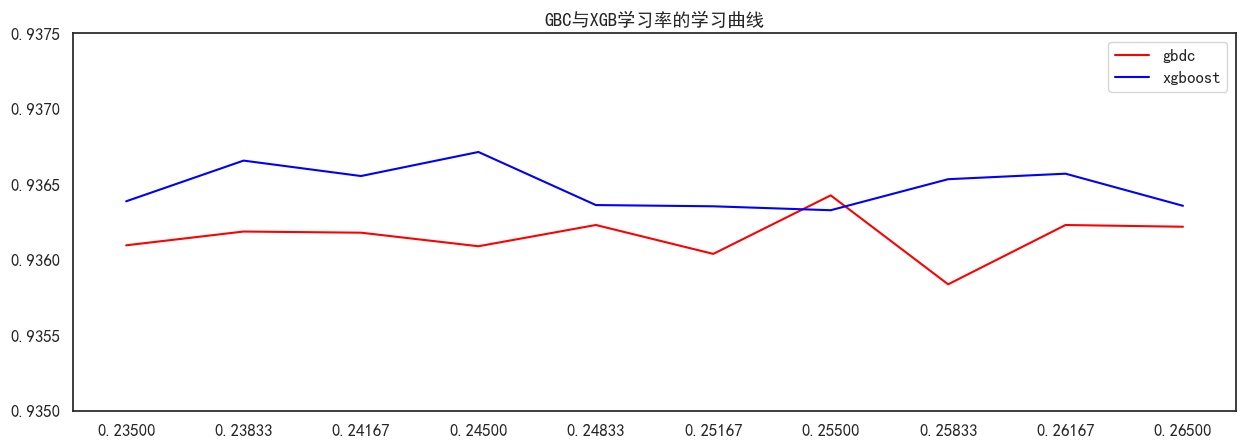

In [241]:
lr_range = np.linspace(0.235,0.265,10)
plt.figure(figsize=(15,5),dpi=100)
plt.plot(lr_range,gbdc_result_1,c='red',label='gbdc')
plt.plot(lr_range,xgb_result_1,c='blue',label='xgboost')
print('GBDC最高分是{:.5f},最高分对应的学习率是{}'.format(max(gbdc_result_1),lr_range[gbdc_result_1.index(max(gbdc_result_1))]))
print('XGB最高分是{:.5f},最高分对应的学习率是{}'.format(max(xgb_result_1),lr_range[xgb_result_1.index(max(xgb_result_1))]))

plt.xticks(lr_range)
plt.title('GBC与XGB学习率的学习曲线')
plt.ylim((0.935,0.9375))
plt.legend()
plt.show()

在这里可以确定GBDC的学习率为0.255 ，XGB的学习率为0.245 。可以基于学习率的结果，再次尝试调整GBDC树的数量。

对抗过拟合

In [242]:
rf = RFC(n_estimators=500
         ,random_state=1412
         ,class_weight={0:0.5,1:2.5})
gbdc = GBC(n_estimators=200
           ,learning_rate=0.255
           ,random_state=1412)

param = {'objective':'binary:logistic'
         ,'eval_metric':'auc'
         ,'scale_pos_weight':0.03
         ,'eta':0.245}
xgbcv = xgb.cv(param,dtrain,num_boost_round=70,nfold=5,seed=1412,shuffle=True)

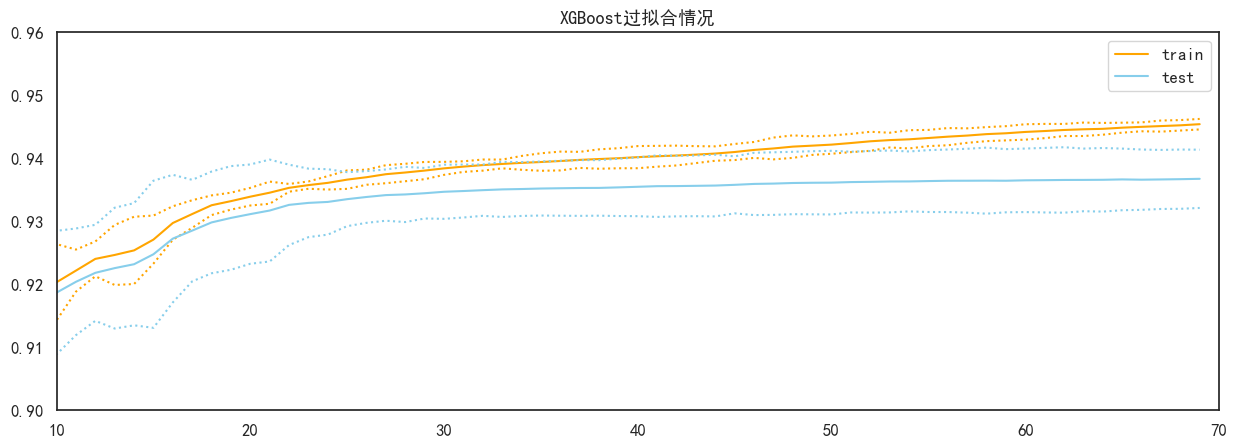

In [243]:
# xgboost交叉验证功能支持提取出训练集与验证集的差异，进行绘图
plt.figure(figsize=(15,5),dpi=100)
plt.plot(xgbcv.index,xgbcv['train-auc-mean'],c='orange',label='train')
plt.plot(xgbcv.index,xgbcv['train-auc-mean']+xgbcv['train-auc-std']*5,c='orange',linestyle='dotted')
plt.plot(xgbcv.index,xgbcv['train-auc-mean']-xgbcv['train-auc-std']*5,c='orange',linestyle='dotted')

plt.plot(xgbcv.index,xgbcv['test-auc-mean'],c='skyblue',label='test')
plt.plot(xgbcv.index,xgbcv['test-auc-mean']+xgbcv['test-auc-std']*5,c='skyblue',linestyle='dotted')
plt.plot(xgbcv.index,xgbcv['test-auc-mean']-xgbcv['test-auc-std']*5,c='skyblue',linestyle='dotted')
plt.title('XGBoost过拟合情况')
plt.legend()
plt.xlim(10,70)
plt.ylim((0.9,0.96))
plt.show()

In [244]:
rf_result_md=[]
gbdc_result_md = []
xgb_result_md = []
for max_depth in range(5,35,5):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    
    rf = RFC(n_estimators=500,max_depth=max_depth,random_state=1412,class_weight={0:0.5,1:2.5})
    gbdc = GBC(n_estimators=200,max_depth=max_depth,learning_rate=0.255,random_state=1412)
    param = {'objective':'binary:logistic','max_depth':max_depth,'eval_metric':'auc','scale_pos_weight':0.03,'eta':0.245}
    
    
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    xgbcv = xgb.cv(param,dtrain,num_boost_round=70,nfold=5,seed=1412,shuffle=True)
    test_auc = xgbcv.loc[69,'test-auc-mean']
    
    rf_result_md.append(rfcv.mean())
    gbdc_result_md.append(gbdcv.mean())
    xgb_result_md.append(test_auc)
    
    print(max_depth)
    print('\t rf:{:.5f}'.format(rfcv.mean()))
    print('\t gbd:{:.5f}'.format(gbdcv.mean()))
    print('\t xgb:{:.5f}'.format(test_auc))

5
	 rf:0.90671
	 gbd:0.93535
	 xgb:0.93612
10
	 rf:0.92944
	 gbd:0.92793
	 xgb:0.93674
15
	 rf:0.93130
	 gbd:0.92667
	 xgb:0.93603
20
	 rf:0.92936
	 gbd:0.92678
	 xgb:0.93554
25
	 rf:0.92930
	 gbd:0.92522
	 xgb:0.93558
30
	 rf:0.92904
	 gbd:0.91451
	 xgb:0.93570


GBDC最高分是0.93535,最高分对应的最大深度是5
XGB最高分是0.93674,最高分对应的最大深度是10
rf最高分是0.93130,最高分对应的最大深度是15


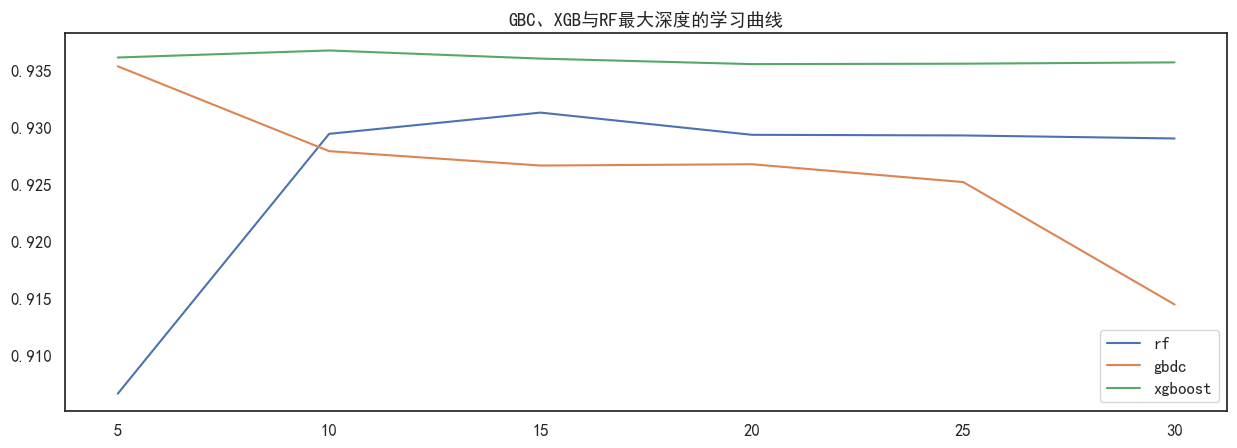

In [245]:
md_range = range(5,35,5)
plt.figure(figsize=(15,5),dpi=100)
plt.plot(md_range,rf_result_md,label='rf')
plt.plot(md_range,gbdc_result_md,label='gbdc')
plt.plot(md_range,xgb_result_md,label='xgboost')
print('GBDC最高分是{:.5f},最高分对应的最大深度是{}'.format(max(gbdc_result_md),md_range[gbdc_result_md.index(max(gbdc_result_md))]))
print('XGB最高分是{:.5f},最高分对应的最大深度是{}'.format(max(xgb_result_md),md_range[xgb_result_md.index(max(xgb_result_md))]))
print('rf最高分是{:.5f},最高分对应的最大深度是{}'.format(max(rf_result_md),md_range[rf_result_md.index(max(rf_result_md))]))

plt.xticks(md_range)
plt.title('GBC、XGB与RF最大深度的学习曲线')
# plt.ylim((0.935,0.9375))
plt.legend()
plt.show()

In [246]:
result = []
for max_depth in range(10,21):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    rf = RFC(n_estimators=500,max_depth=max_depth,random_state=1412,class_weight={0:0.5,1:2.5})
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    result.append(rfcv.mean())

RF最高分是0.93197,最高分对应的最大深度为13


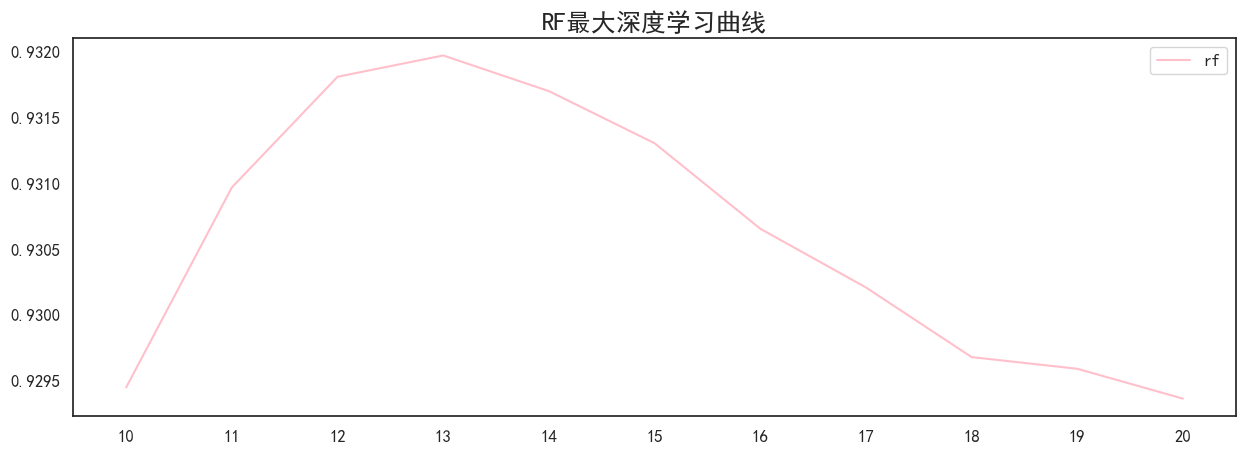

In [247]:
max_depth = range(10,21)
plt.figure(figsize=(15,5),dpi=100)
plt.plot(max_depth,result,c='pink',label='rf')
print('RF最高分是{:.5f},最高分对应的最大深度为{}'.format(max(result),max_depth[result.index(max(result))]))

plt.title('RF最大深度学习曲线',fontsize=18)
plt.legend()
plt.xticks(max_depth)
plt.show()

In [248]:
rf_result = []
for num_round in [100,200,300,400,500]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    rf = RFC(n_estimators=num_round,max_depth=13,random_state=1412,class_weight={0:0.5,1:2.5})
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring='roc_auc')
    rf_result.append(rfcv.mean())

RF最高分是0.93197,最高分对应的树的数量为500


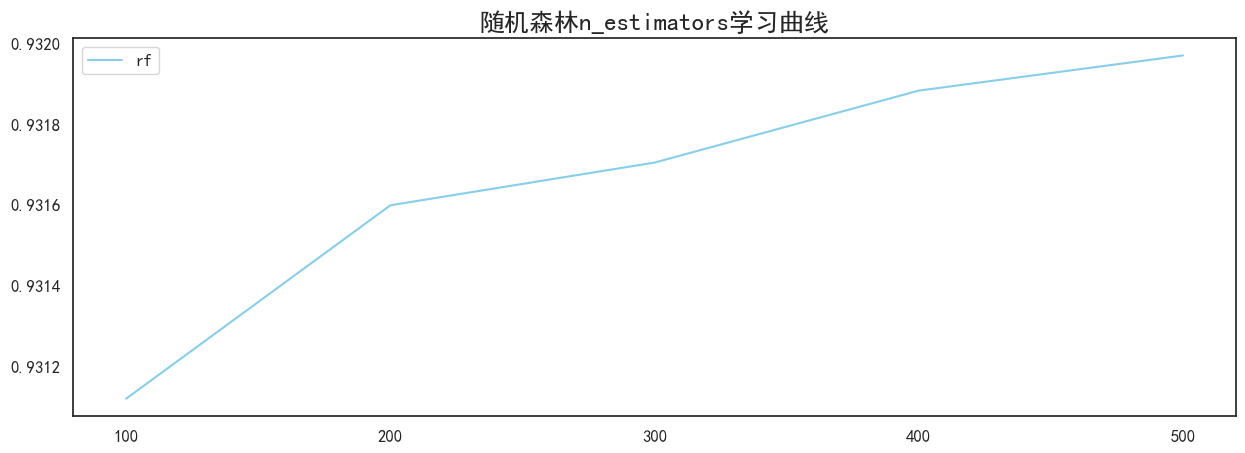

In [249]:
num_round = [100,200,300,400,500]
plt.figure(figsize=(15,5),dpi=100)
plt.plot(num_round,rf_result,c='skyblue',label='rf')
print('RF最高分是{:.5f},最高分对应的树的数量为{}'.format(max(rf_result),num_round[rf_result.index(max(rf_result))]))

plt.title('随机森林n_estimators学习曲线',fontsize=18)
plt.legend()
plt.xticks(num_round)
plt.show()

In [250]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [251]:
# 调参后的模型
rf = RFC(n_estimators=500,max_depth=13,random_state=1412,class_weight={0:0.5,1:2.5})
gbdc = GBC(n_estimators=200,learning_rate=0.255,random_state=1412)
param = {'objective':'binary:logistic'
        ,'eval_metric':'auc'
         ,'scale_pos_weight':0.03
         ,'eta':0.245}

In [252]:
# 在训练集集上进行训练
rf = rf.fit(Xtrain,Ytrain)
gbdc = gbdc.fit(Xtrain,Ytrain)
xgbc = xgb.train(param,dtrain,num_boost_round=70)

In [253]:
# 在训练集上输出训练概率
rf_prob_train = rf.predict_proba(Xtrain)
gbdc_prob_train = gbdc.predict_proba(Xtrain)
xgb_prob_train = xgbc.predict(dtrain)
#sklearn中，predict输出具体的类别（0，1），predict_propa输出概率
#xgboost中predict直接输出概率，没有输出类别的接口

In [254]:
# 查看三个模型的ROC，确定权重
roc_auc_score(Ytrain,rf_prob_train[:,1])

0.9625635250315557

In [255]:
roc_auc_score(Ytrain,gbdc_prob_train[:,1])

0.9447890390161411

In [256]:
roc_auc_score(Ytrain,xgb_prob_train)

0.9444194778177636

In [257]:
# 训练集的软投票
prob_train = pd.concat([pd.DataFrame(rf_prob_train,columns=['rf0','rf1'])
                       ,pd.DataFrame(gbdc_prob_train,columns=['gbdc0','gbdc1'])
                       ,pd.DataFrame(xgb_prob_train,columns=['xgb1'])]
                      ,axis = 1)

In [258]:
# 计算xgb输出的0的概率
prob_train['xgb0'] = 1 - prob_train['xgb1']

In [259]:
# 将所有的样本为0的概率按权重加和
prob_train.loc[:,'0'] = 4*prob_train.loc[:,'rf0'] + 0.8*prob_train.loc[:,'gbdc0'] + 0.2*prob_train.loc[:,'xgb0']

In [260]:
# 将所有的样本为1的概率按权重加和
prob_train.loc[:,'1'] = 4*prob_train.loc[:,'rf1'] + 0.8*prob_train.loc[:,'gbdc1'] + 0.2*prob_train.loc[:,'xgb1']

In [261]:
# 将为1的概率压缩到[0,1]之间，当做最终的概率来输入auc计算函数
prob_train['adjusted1'] = prob_train.loc[:,'1']/(prob_train.loc[:,'1']+prob_train.loc[:,'0'])

In [262]:
# 计算整体的auc
roc_auc_score(Ytrai
              n,prob_train['adjusted1'])

SyntaxError: invalid syntax (<ipython-input-262-a529e7cb1728>, line 3)

In [ ]:
# 在测试集上输出测试概率
rf_prob_test = rf.predict_proba(Xtest)
gbdc_prob_test = gbdc.predict_proba(Xtest)
xgb_prob_test = xgbc.predict(dtest)

In [ ]:
# 测试集的软投票
prob_test = pd.concat([pd.DataFrame(rf_prob_test,columns=['rf0','rf1'])
                       ,pd.DataFrame(gbdc_prob_test,columns=['gbdc0','gbdc1'])
                       ,pd.DataFrame(xgb_prob_test,columns=['xgb1'])]
                      ,axis = 1)

In [ ]:
# 计算xgb输出的0的概率
prob_test['xgb0'] = 1 - prob_test['xgb1']

In [ ]:
# 将所有的样本为0的概率按权重加和
prob_test.loc[:,'0'] = 4*prob_test.loc[:,'rf0'] + 0.8*prob_test.loc[:,'gbdc0'] + 0.2*prob_test.loc[:,'xgb0']

In [ ]:
# 将所有的样本为0的概率按权重加和
prob_test.loc[:,'1'] = 4*prob_test.loc[:,'rf1'] + 0.8*prob_test.loc[:,'gbdc1'] + 0.2*prob_test.loc[:,'xgb1']

In [ ]:
# 将为1的概率压缩到[0,1]之间，当做最终的概率来输入auc计算函数
prob_test['adjusted1'] = prob_test.loc[:,'1']/(prob_test.loc[:,'1']+prob_test.loc[:,'0'])

In [ ]:
# 计算整体的auc
roc_auc_score(Ytest,prob_test['adjusted1'])